In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
input_path = 'Cotton Disease'
train_path = input_path + 'train'
valid_path = input_path + 'valid'

In [37]:
train_datagen =  ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory('Cotton Disease/train',
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='sparse'
                                                   )


valid_datagen = ImageDataGenerator(rescale = 1./255)


valid_generator = valid_datagen.flow_from_directory('Cotton Disease/val' , 
                                                   target_size = (224,224),
                                                   batch_size=32,
                                                   class_mode='sparse')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


## Build Model 

In [38]:
num_classes = 4
model = Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu', padding='same' ,  input_shape=(224,224,3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(64 , kernel_size=(3,3) , activation='relu' , padding='same'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes , activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 200704)            0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [40]:
model.compile(optimizer = Adam(learning_rate = 0.0001) , loss='sparse_categorical_crossentropy' , metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 200704)            0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [42]:
valid_generator.target_sizesize

(224, 224, 3)

In [43]:
history = model.fit(
                train_generator,
                steps_per_epoch=len(train_generator),
                epochs=15,
                validation_data = valid_generator,
                validation_steps = len(valid_generator)
)

Epoch 1/15
61/61 [==============================] - 29s 454ms/step - loss: 1.2995 - acc: 0.4065 - val_loss: 1.1461 - val_acc: 0.5375
Epoch 2/15
61/61 [==============================] - 32s 528ms/step - loss: 1.1378 - acc: 0.5028 - val_loss: 1.0105 - val_acc: 0.5731
Epoch 3/15
61/61 [==============================] - 30s 488ms/step - loss: 1.0454 - acc: 0.5500 - val_loss: 0.9140 - val_acc: 0.6087
Epoch 4/15
61/61 [==============================] - 32s 522ms/step - loss: 0.9479 - acc: 0.6043 - val_loss: 0.9646 - val_acc: 0.5178
Epoch 5/15
61/61 [==============================] - 30s 483ms/step - loss: 0.8766 - acc: 0.6581 - val_loss: 0.8552 - val_acc: 0.6008
Epoch 6/15
61/61 [==============================] - 32s 522ms/step - loss: 0.8549 - acc: 0.6658 - val_loss: 0.7474 - val_acc: 0.6917
Epoch 7/15
61/61 [==============================] - 30s 493ms/step - loss: 0.8290 - acc: 0.6725 - val_loss: 0.7798 - val_acc: 0.6719
Epoch 8/15
61/61 [==============================] - 31s 503ms/step - 

1/1 [==============================] - 0s 46ms/step
this is the Fresh cotton leaf [[0.44539014 0.32664594 0.79242665 0.35726306]]


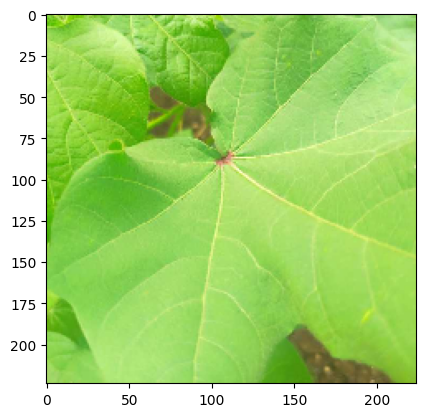

In [67]:
test_image = image.load_img('Cotton Disease/test/fresh cotton leaf/d (329)_iaip.jpg',
                            target_size = (224,224))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)

test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print("this is the Fresh cotton leaf", result)

1/1 [==============================] - 0s 41ms/step
This is the Disesed leaf [[1. 0. 1. 0.]]


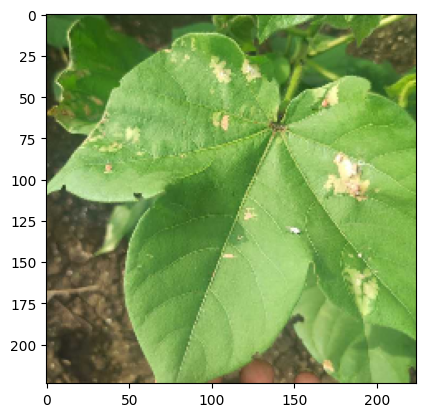

In [69]:
#Input image
test_image = image.load_img('Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print("This is the Disesed leaf",result)


In [79]:
Model = model.save('Cotton_plant_save/model_save.h5')